## Proyect 1: Population synthesis

In [182]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
M_sun = 2e30
N = 1000# number of objects 
t = 8e9#cluster age in years

### Star formation 
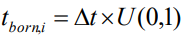

In [183]:
delta_t = 1e9 #años
t_born = delta_t * np.random.rand(N)

### Initial Mass function: 

#### Salpeter55

Inversion technique

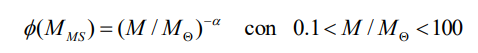

$ p(x) = p(y)\frac{dy}{dx} -->  X = \int \phi_{MS} = \int (M/M_{sun})^{-\alpha} = \frac{(M/M_{sun})^{1-\alpha}}
{1 -\alpha} $

$M = (X(1-\alpha))^{\frac{1}{1-\alpha}}$

(array([975.,  16.,   5.,   1.,   0.,   1.,   0.,   1.,   0.,   1.]),
 array([ 0.10000537,  1.77202741,  3.44404944,  5.11607148,  6.78809352,
         8.46011556, 10.13213759, 11.80415963, 13.47618167, 15.1482037 ,
        16.82022574]),
 <BarContainer object of 10 artists>)

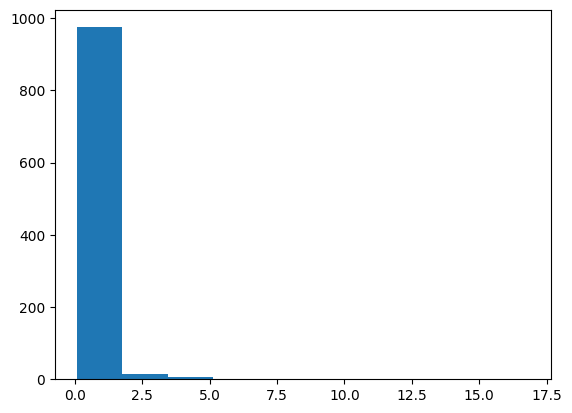

In [184]:
maxM = 100 # masas solares
minM = 0.1 #masas solares
X = ((-0.001 -( -16.5831))*np.random.rand(N) - 16.5831)
alpha = 2.35

M = (X*(1-alpha))**(1/(1-alpha))
plt.hist(M)

### Accept-rejection method: Salpeter55

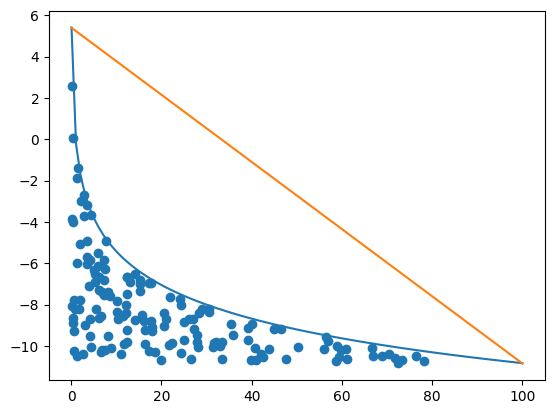

In [185]:
p = np.linspace(0.1, 100, 100)

alpha = 2.35
def mass_function(mass):
    return mass**(-alpha)

def log_mf(mass):
    return np.log(mass_function(mass))

# La funcion que acota sera un triangulo, vamos a hallarla
y2 = log_mf(maxM)
y1 = log_mf(minM)
m = (y2 - y1) / (maxM - minM)
b = log_mf(0.1)

plt.plot(p, log_mf(p) )
plt.plot(p, m*p + b)

#Empezamos a lanzar puntos
x = (maxM-minM)*np.random.rand(N) + minM 
y = (y1 -y2)*np.random.rand(N) + y2 #(np.log((100-0.1)*np.random.rand(N) + 0.1**(-alpha)) - y2 )*np.random.rand(N) +y2  ...(m*x+b - y2 )*np.random.rand(N) +y2

x_1 = []
y_1 = []

for i in range(len(x)):
    f = np.log(x[i]**(-alpha))
    if f > y[i]:
        x_1.append(x[i])
        y_1.append(y[i])
    else:
        None
    
plt.scatter(x_1,y_1)

In [186]:
L=[]
for star in range(len(massDistribution)):
    if star <= 2:
        L.append(0.75*star**4.8)
    elif star <= 20:
        L.append(1.78*star**3.5)
    else:
        L.append(81*star**2.14)


    
